In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [45]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [84]:
# 자치구 뽑아올데이터
gu_data = pd.read_csv('../data/공공자전거대여소정보수정2212.csv', encoding='ansi', )
gu_data.columns =['대여 대여소번호','대여 대여소명','자치구','상세주소','위도','경도','설치시기','거치대수1','거치대수2','운영방식']
gu_data

,대여 대여소번호,대여 대여소명,자치구,상세주소,위도,경도,설치시기,거치대수1,거치대수2,운영방식
0,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR
1,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 새문안로 82 광화문S타워 앞,37.569969,126.973938,2015-10-07,NaN,31.0,QR
2,305,종로구청 옆,종로구,서울특별시 종로구 새문안로 102-2 가로판매대,37.569962,126.976158,2015-10-07,NaN,13.0,QR
3,307,서울역사박물관 앞,종로구,서울특별시 종로구 삼청로 30 국립현대미술관 서울관,37.579708,126.980858,2015-10-07,NaN,10.0,QR
4,308,광화문 S타워 앞,종로구,서울특별시 종로구 종로 47 종각역 1번출구 앞,37.570396,126.981789,2015-10-07,NaN,8.0,QR
...,...,...,...,...,...,...,...,...,...,...
2710,3691,둔촌역 2번출구,강동구,강동구 명일동 303-7,37.551426,127.144211,2022-06-20,NaN,6.0,QR
2711,3692,둔촌오륜역 1번 출구,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR
2712,3694,강동리엔파크 13단지(1303동 앞),강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR
2713,3698,명일역 3번출구 옆,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR


In [28]:
# 자치구 개수확인
gu_data['자치구'].unique().shape

(25,)

In [30]:
# 대여소 고유번호를 이용해 자치구 삽입
dataset1 = gu_data[['대여 대여소번호','자치구']]
dataset1

,대여 대여소번호,자치구
0,302,종로구
1,303,종로구
2,305,종로구
3,307,종로구
4,308,종로구
...,...,...
2710,3691,강동구
2711,3692,강동구
2712,3694,강동구
2713,3698,강동구


In [20]:
# 22년 9월 데이터
df_09 = pd.read_csv(r'../data/서울특별시 공공자전거 대여이력 정보_2209.csv',encoding = 'ansi')
df_09

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-54802,2022-09-01 0:00,794,양천문화회관,0,2022-09-01 0:01,794,양천문화회관,0,0,0.00,2006,M,내국인,ST-2395,ST-2395
1,SPB-52640,2022-09-01 0:01,4472,송파파크데일 1단지 115동 건너편,0,2022-09-01 0:01,4472,송파파크데일 1단지 115동 건너편,0,0,0.00,1957,\N,내국인,ST-2585,ST-2585
2,SPB-45219,2022-09-01 0:01,2219,"고속터미널역 8-1번, 8-2번 출구 사이",0,2022-09-01 0:01,2219,"고속터미널역 8-1번, 8-2번 출구 사이",0,0,0.00,2004,M,내국인,ST-750,ST-750
3,SPB-44050,2022-09-01 0:01,568,청계8가사거리 부근,0,2022-09-01 0:02,568,청계8가사거리 부근,0,0,0.00,\N,F,내국인,ST-369,ST-369
4,SPB-51340,2022-09-01 0:00,3120,DMC엘가아파트 앞,0,2022-09-01 0:02,170,DMC파크뷰자이아파트 302동 앞,0,2,0.00,1993,F,내국인,ST-2205,ST-227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,SPB-35935,2022-09-08 17:05,3549,건영아파트 앞,0,2022-09-08 17:20,3578,중곡동 파크웨이빌딩,0,15,1658.96,1992,M,내국인,ST-2331,ST-2317
1048571,SPB-38694,2022-09-08 16:46,241,신길우성1차아파트 앞 공원,0,2022-09-08 17:20,700,KB국민은행 염창역 지점 앞,0,34,7010.17,\N,F,내국인,ST-290,ST-308
1048572,SPB-33571,2022-09-08 17:16,1643,태릉입구역 8번출구,0,2022-09-08 17:20,1468,먹골역 7번 출구,0,4,603.44,1993,M,내국인,ST-1111,ST-2289
1048573,SPB-36820,2022-09-08 17:08,1385,성신여대입구역 3번출구 앞,0,2022-09-08 17:20,1385,성신여대입구역 3번출구 앞,0,11,1941.64,1995,M,내국인,ST-2226,ST-2226


In [61]:
# 기본데이터에 대여소번호를 이용하여 자치구합침
m_data_09 = pd.merge(df_09, dataset1, on='대여 대여소번호')
m_data_09

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자치구
0,SPB-54802,2022-09-01 0:00,794,양천문화회관,0,2022-09-01 0:01,794,양천문화회관,0,0,0.00,2006,M,내국인,ST-2395,ST-2395,양천구
1,SPB-57826,2022-09-01 0:09,794,양천문화회관,0,2022-09-01 0:17,770,목동역5번출구 교통정보센터 앞,0,7,1312.66,1973,\N,내국인,ST-2395,ST-1996,양천구
2,SPB-51046,2022-09-01 0:05,794,양천문화회관,0,2022-09-01 0:31,1966,한마을아파트 정문상가,0,25,2908.95,2004,F,내국인,ST-2395,ST-1228,양천구
3,SPB-54802,2022-09-01 0:37,794,양천문화회관,0,2022-09-01 0:43,722,경서농협 버스정류장(우리은행신정동지점방향),0,5,733.84,\N,M,내국인,ST-2395,ST-993,양천구
4,SPB-63681,2022-09-01 1:18,794,양천문화회관,0,2022-09-01 1:21,734,신트리공원 입구,0,3,690.00,\N,M,내국인,ST-2395,ST-1005,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040821,SPB-31441,2022-09-08 16:37,5756,극동아파트,0,2022-09-08 17:12,2621,한성백제역 2번 출구,0,35,3534.83,1997,M,내국인,ST-3131,ST-1719,송파구
1040822,SPB-60393,2022-09-08 17:05,5756,극동아파트,0,2022-09-08 17:14,1013,강동구청역 1번 출입구,0,8,1250.00,1994,M,내국인,ST-3131,ST-497,송파구
1040823,SPB-37886,2022-09-08 16:30,5758,올림픽선수기자촌아파트 123동 근처,0,2022-09-08 16:43,2608,송파구청,0,13,2316.64,1998,F,내국인,ST-3133,ST-1681,송파구
1040824,SPB-58344,2022-09-08 16:43,5758,올림픽선수기자촌아파트 123동 근처,0,2022-09-08 16:57,4865,한성백제역 1번출구 뒤,0,13,1680.00,\N,F,내국인,ST-3133,ST-2797,송파구


In [113]:
# 대여위치의 자치구 카운팅 
c_data_09 = m_data_09['자치구'].value_counts()

In [72]:
# 9월 가장많이 대여한 대여소 
data_09 = m_data_09[['대여 대여소명','자치구']]
data_09.value_counts()

대여 대여소명              자치구 
뚝섬유원지역 1번출구 앞        광진구     4538
여의나루역 1번출구 앞         영등포구    4056
마곡나루역 2번 출구          강서구     3935
한강공원 망원나들목           마포구     3898
봉림교 교통섬              관악구     2630
                             ... 
하얏트호텔 앞              용산구        7
서울숲 IT캐슬             성동구        7
구룡터널 입구(개포1단지아파트)    강남구        4
아현문화건강센터             마포구        3
올림픽선수기자촌아파트 123동 근처  송파구        3
Length: 2629, dtype: int64

In [ ]:
#--------------------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------------------

In [85]:
# 6월 데이터
df_06 = pd.read_csv(r'../data/서울특별시 공공자전거 이용정보(월별)_22.06.csv',encoding = 'ansi')

In [48]:
# 대여소번호 컬럼명 변경
df_06.rename(columns={'대여소번호':'대여 대여소번호'}, inplace=True)
df_06

,대여일자,대여 대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06,3,중랑센터,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,2022-06,3,중랑센터,정기,\N,20대,12,330.13,3.39,14626.81,75
3,2022-06,3,중랑센터,정기,\N,60대,4,113.53,1.02,4410.69,22
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4
...,...,...,...,...,...,...,...,...,...,...,...
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,88888.영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,99998. 상암단말정비,정기,\N,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,99999. 영남단말기정비,정기,\N,기타,15,0.00,0.00,0.00,25


In [49]:
# 기본데이터에 대여소번호를 이용하여 자치구합침
m_data_06 = pd.merge(df_06, dataset1, on='대여 대여소번호')
m_data_06

,대여일자,대여 대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),자치구
0,2022-06,102,102. 망원역 1번출구 앞,단체,\N,10대,3,94.02,1.31,5653.27,110,마포구
1,2022-06,102,102. 망원역 1번출구 앞,단체,\N,20대,9,645.20,6.59,28401.76,284,마포구
2,2022-06,102,102. 망원역 1번출구 앞,단체,\N,50대,3,179.68,1.85,7960.04,125,마포구
3,2022-06,102,102. 망원역 1번출구 앞,단체,F,10대,1,120.51,1.09,4681.84,82,마포구
4,2022-06,102,102. 망원역 1번출구 앞,단체,F,20대,5,453.62,4.09,17622.86,152,마포구
...,...,...,...,...,...,...,...,...,...,...,...,...
131472,2022-06,5855,5855. 하이투자증권 앞,정기,M,40대,83,11150.75,86.34,372231.61,2804,영등포구
131473,2022-06,5855,5855. 하이투자증권 앞,정기,M,50대,44,7858.09,55.73,240343.25,1707,영등포구
131474,2022-06,5855,5855. 하이투자증권 앞,정기,M,60대,2,645.79,5.19,22380.00,141,영등포구
131475,2022-06,5855,5855. 하이투자증권 앞,정기,M,70대이상,10,365.50,3.16,13573.58,643,영등포구


In [88]:
# 데이터합치기
datatotal=pd.concat([m_data_09,m_data_06],ignore_index=True)
datatotal

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자치구,대여일자,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리(M)
0,SPB-54802,2022-09-01 0:00,794,양천문화회관,0.0,2022-09-01 0:01,794,양천문화회관,0,0,0.00,2006,M,내국인,ST-2395,ST-2395,양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPB-57826,2022-09-01 0:09,794,양천문화회관,0.0,2022-09-01 0:17,770,목동역5번출구 교통정보센터 앞,0,7,1312.66,1973,\N,내국인,ST-2395,ST-1996,양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPB-51046,2022-09-01 0:05,794,양천문화회관,0.0,2022-09-01 0:31,1966,한마을아파트 정문상가,0,25,2908.95,2004,F,내국인,ST-2395,ST-1228,양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPB-54802,2022-09-01 0:37,794,양천문화회관,0.0,2022-09-01 0:43,722,경서농협 버스정류장(우리은행신정동지점방향),0,5,733.84,\N,M,내국인,ST-2395,ST-993,양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPB-63681,2022-09-01 1:18,794,양천문화회관,0.0,2022-09-01 1:21,734,신트리공원 입구,0,3,690.00,\N,M,내국인,ST-2395,ST-1005,양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172298,NaN,NaN,5855,NaN,NaN,NaN,NaN,NaN,NaN,2804,NaN,NaN,M,NaN,NaN,NaN,영등포구,2022-06,5855. 하이투자증권 앞,정기,40대,83.0,11150.75,86.34,372231.61
1172299,NaN,NaN,5855,NaN,NaN,NaN,NaN,NaN,NaN,1707,NaN,NaN,M,NaN,NaN,NaN,영등포구,2022-06,5855. 하이투자증권 앞,정기,50대,44.0,7858.09,55.73,240343.25
1172300,NaN,NaN,5855,NaN,NaN,NaN,NaN,NaN,NaN,141,NaN,NaN,M,NaN,NaN,NaN,영등포구,2022-06,5855. 하이투자증권 앞,정기,60대,2.0,645.79,5.19,22380.00
1172301,NaN,NaN,5855,NaN,NaN,NaN,NaN,NaN,NaN,643,NaN,NaN,M,NaN,NaN,NaN,영등포구,2022-06,5855. 하이투자증권 앞,정기,70대이상,10.0,365.50,3.16,13573.58


In [89]:
# total 대여위치의 자치구 카운팅 
c_data = datatotal['자치구'].value_counts()
c_data

강서구     125998
송파구     105841
영등포구     94488
노원구      66728
양천구      65484
마포구      61150
광진구      55758
강동구      51504
성동구      44885
구로구      43592
동대문구     41548
서초구      40906
종로구      39813
강남구      38646
중랑구      34458
은평구      32076
관악구      30786
성북구      30259
중구       28861
용산구      26944
동작구      25953
도봉구      25140
서대문구     24271
금천구      19158
강북구      18056
Name: 자치구, dtype: int64

In [90]:
# 6월 9월 가장많이 대여한 대여소 
total_data1 = datatotal[['대여 대여소명','자치구']]
total_data1.value_counts()

대여 대여소명              자치구 
뚝섬유원지역 1번출구 앞        광진구     4538
여의나루역 1번출구 앞         영등포구    4056
마곡나루역 2번 출구          강서구     3935
한강공원 망원나들목           마포구     3898
봉림교 교통섬              관악구     2630
                             ... 
하얏트호텔 앞              용산구        7
서울숲 IT캐슬             성동구        7
구룡터널 입구(개포1단지아파트)    강남구        4
아현문화건강센터             마포구        3
올림픽선수기자촌아파트 123동 근처  송파구        3
Length: 2629, dtype: int64

<AxesSubplot:>

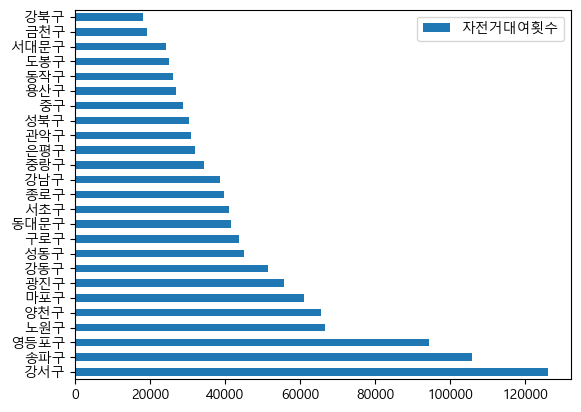

In [101]:
# total 자치구별 대여횟수 시각화 
total_p=pd.DataFrame(c_data)
total_p.columns=['자전거대여횟수']
total_p.plot.barh()

In [99]:
# 자치구 별 대여소갯수
a_area =pd.DataFrame(dataset1['자치구'].value_counts()) 
a_area.columns=['대여소 개수']
a_area.index.names = ["자치구"]
a_area['자치구'] = a_area.index
# a_area = a_area.style.hide_index()
a_area

,대여소 개수,자치구
자치구,,
송파구,214,송파구
강서구,188,강서구
강남구,169,강남구
영등포구,152,영등포구
서초구,145,서초구
노원구,135,노원구
마포구,122,마포구
강동구,121,강동구
양천구,109,양천구


<Figure size 1600x700 with 0 Axes>

<AxesSubplot:xlabel='자치구', ylabel='대여소 개수'>

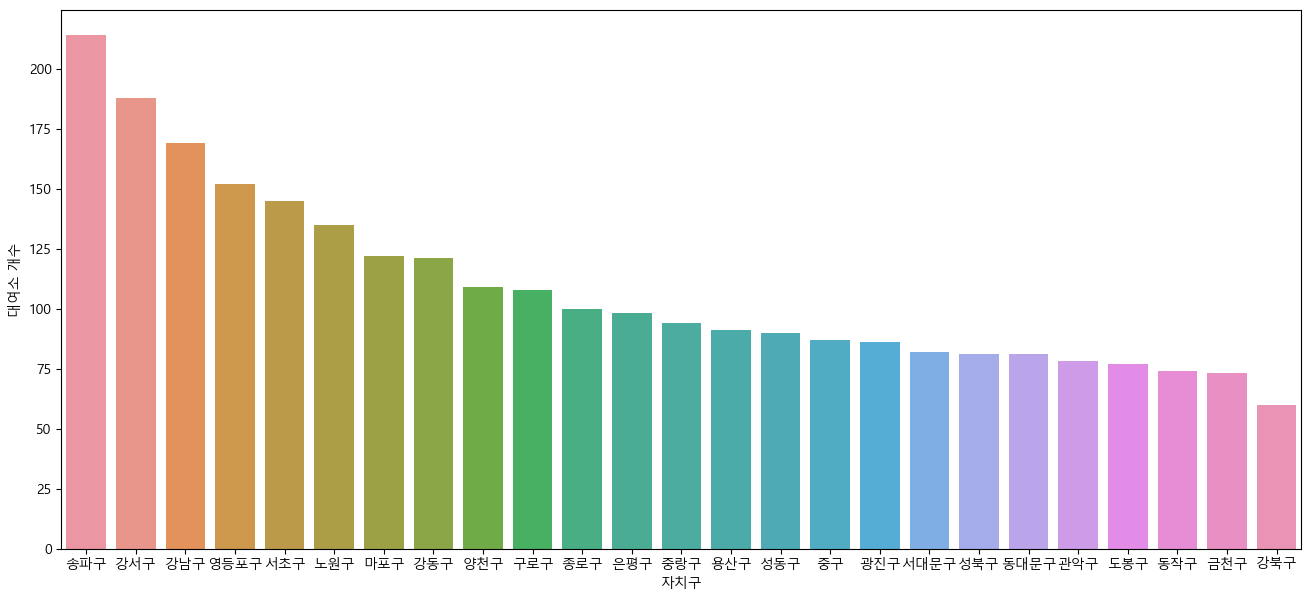

In [100]:
# 대여소개수 시각화
plt.figure(figsize = (16, 7))
sns.barplot(data = a_area, x = '자치구', y = '대여소 개수')
plt.show()